In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Feature Engineering with Polynomial Regression

## Generate Polynomial Dataset

In [2]:
# Generate Dataset
x = np.arange(0, 20, 1)
y = -1 + 2 * x** 2
X = x.reshape(-1, 1)

In [3]:
# Gradient Descent Functions
def compute_cost(x, y, w, b):
    m = len(y)
    total_cost = 0
    for xi, yi in zip(x, y):
        total_cost += (yi - (w * xi + b)) ** 2
    return total_cost / (2 * m)

def compute_gradients(x, y, w, b):
    m = len(y)
    dj_dw = 0.0
    dj_db = 0.0
    for xi, yi in zip(x, y):
        error = (yi - (w * xi + b))
        dj_dw += -xi * error
        dj_db += -error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, num_iterations, cost_func, grad_func):
    cost_history = []
    params_history = [(w, b)]

    for i in range(num_iterations):
        # Compute gradients
        dj_dw, dj_db = grad_func(x, y, w, b)

        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Compute cost
        cost = cost_func(x, y, w, b)

        # Record history
        cost_history.append(cost)
        params_history.append((w, b))

    return w, b, cost_history, params_history

## Try with Linear Regression Model

w, b by algorithm : [37.3803765], [-106.96235122]


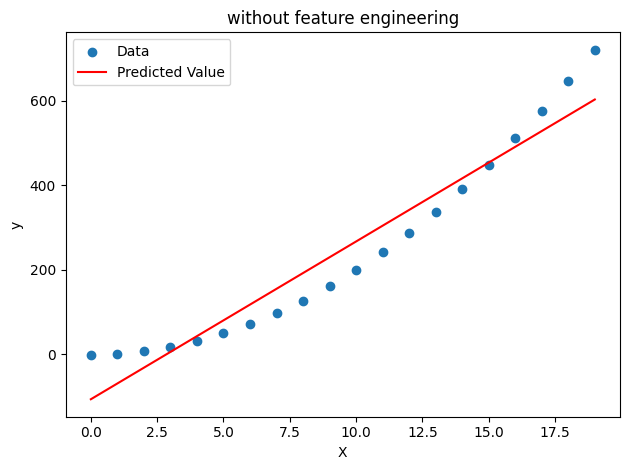

In [4]:
# Try with linear regression model
w_in = 0
b_in = 0
alpha = 1.0e-2
iterations = 1000

w, b, cost_history, params_history = gradient_descent(X, y, w_in, b_in, alpha, iterations, compute_cost, compute_gradients)

print(f'w, b by algorithm : {w}, {b}')

plt.scatter(x, y, label = 'Data')
plt.plot(x, b + X @ w, label = 'Predicted Value', c = 'r')
plt.title('without feature engineering')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.savefig('figures/01.png')
plt.show()

## Feature Engineering : Compare prediction

In [5]:
# Feature Engineering
X_fe = x ** 2
X_fe = X_fe.reshape(-1, 1)

w, b by algorithm : [1.99559188], [0.00415228]


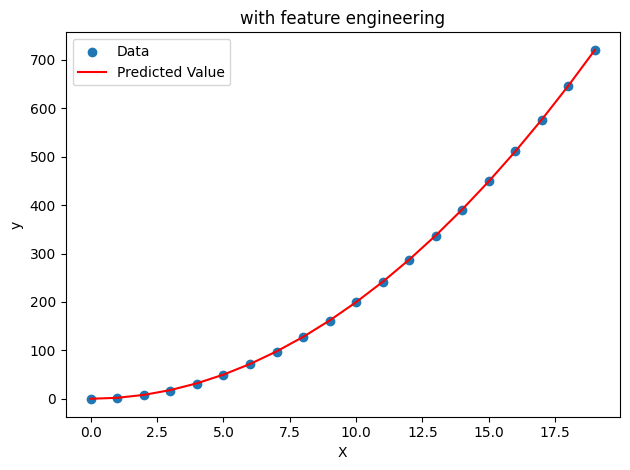

In [6]:
# Try with Polynomial regression model
w_in = 0
b_in = 0
alpha = 1.0e-5
iterations = 1000

w, b, cost_history, params_history = gradient_descent(X_fe, y, w_in, b_in, alpha, iterations, compute_cost, compute_gradients)

print(f'w, b by algorithm : {w}, {b}')

plt.scatter(x, y, label = 'Data')
plt.plot(x, b + X_fe @ w, label = 'Predicted Value', c = 'r')
plt.title('with feature engineering')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.savefig('figures/02.png')
plt.show()

## Feature Selection : Hints for choosing features

In [7]:
# Feature Selection
X_fs = np.c_[x, x**2, x**3]
X_features = ['x', 'x^2', 'x^3']

In [8]:
# Functions for multiple linear regression
def compute_cost(X, y , w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        y_hat_i = np.dot(X[i], w) + b
        cost += (y_hat_i - y[i]) ** 2
    cost /= (2*m)
    return cost

def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.0
    for i in range(m):
        error = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += error * X[i, j]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    cost_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost_history.append(cost_function(X,y,w,b))
    return w, b, cost_history

w, b by algorithm : [0.02304588 0.15371716 0.11029548], 0.002913718679934171


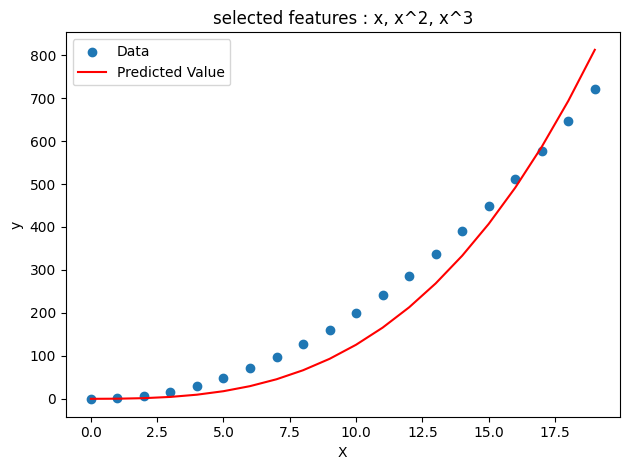

In [9]:
# Treat each power of x as different features
w_in = np.zeros((3,))
b_in = 0
alpha = 1.0e-7
iterations = 1000

w, b, cost_history = gradient_descent(X_fs, y, w_in, b_in, compute_cost, compute_gradient, alpha, iterations)

print(f'w, b by algorithm : {w}, {b}')

plt.scatter(x, y, label = 'Data')
plt.plot(x, b + X_fs @ w, label = 'Predicted Value', c = 'r')
plt.title('selected features : x, x^2, x^3')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.savefig('figures/03.png')
plt.show()

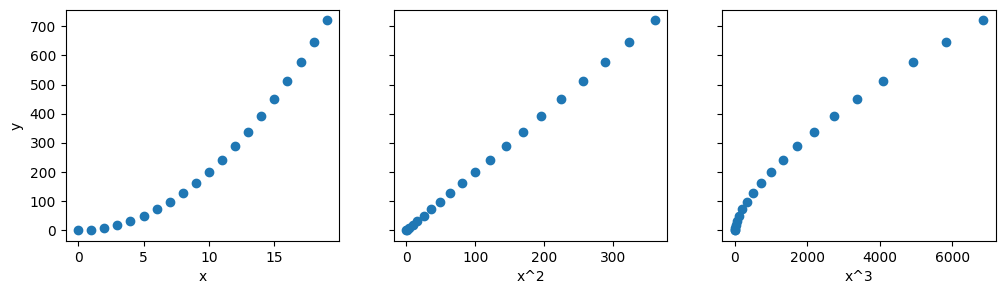

In [10]:
# Linear Interpretation of Features
fig, ax = plt.subplots(1, 3, figsize = (12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X_fs[:, i], y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('y')
plt.savefig('figures/04.png')
plt.show()

## Feature Scaling for Feature Engineering

In [11]:
# Feature Scaling in feature engineering
mu = np.mean(X_fs,axis=0)
sigma = np.std(X_fs,axis=0, ddof = 1)
X_norm = (X_fs - mu)/sigma
print(f'Peak to Peak range in raw     : {np.ptp(X_fs, axis = 0)}')
print(f'Peak to Peak range in Z-score : {np.ptp(X_norm, axis = 0)}')

Peak to Peak range in raw     : [  19  361 6859]
Peak to Peak range in Z-score : [3.21158617 3.10022612 3.1999423 ]


w, b by algorithm : [66.32866982 83.30757133 86.4795909 ], 245.98937987313698


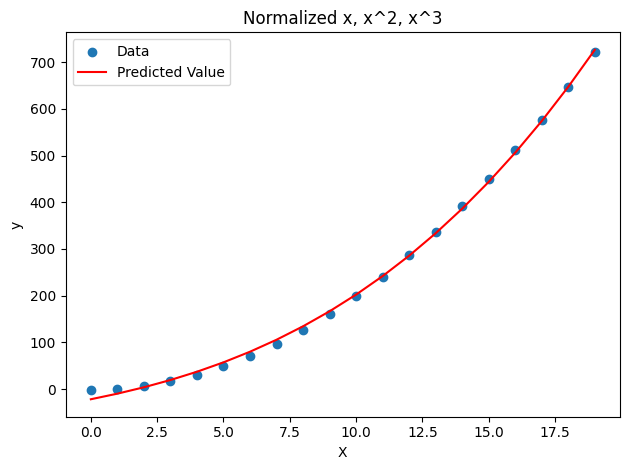

In [12]:
# Increase alpha for better fit
w_in = np.zeros((3,))
b_in = 0
alpha = 1.0e-2
iterations = 1000

w, b, cost_history = gradient_descent(X_norm, y, w_in, b_in, compute_cost, compute_gradient, alpha, iterations)

print(f'w, b by algorithm : {w}, {b}')

plt.scatter(x, y, label = 'Data')
plt.plot(x, b + X_norm @ w, label = 'Predicted Value', c = 'r')
plt.title('Normalized x, x^2, x^3')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.savefig('figures/05.png')
plt.show()

w, b by algorithm : [-3.81902845  3.76706143  6.43265295  0.2989994  -4.22197664 -4.99168127
 -3.21612382 -0.57053374  1.69477231  2.85958918  2.61382133  0.91282985
 -2.13652546], -0.007287194855838871


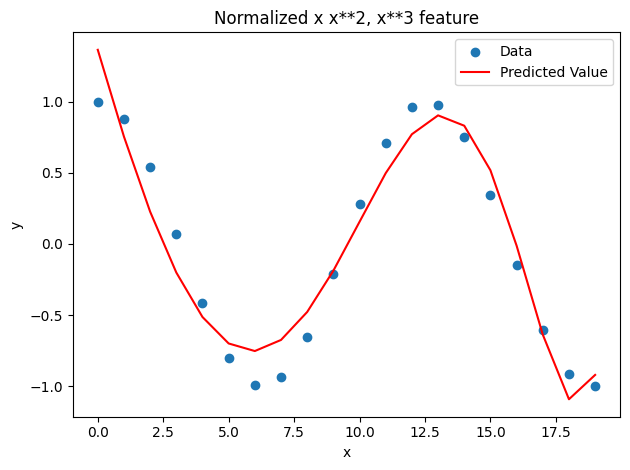

In [13]:
# Feature Engineering for more complex functions
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
mu = np.mean(X,axis=0)
sigma = np.std(X,axis=0, ddof = 1)
X_norm = (X - mu)/sigma

w_in = np.zeros((13,))
b_in = 0
alpha = 1.0e-1
iterations = 100000

w, b, cost_history = gradient_descent(X_norm, y, w_in, b_in, compute_cost, compute_gradient, alpha, iterations)

print(f'w, b by algorithm : {w}, {b}')

plt.scatter(x, y, label="Data")
plt.plot(x,X_norm@w + b, c='r', label="Predicted Value")
plt.title("Normalized x x**2, x**3 feature")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.savefig('figures/06.png')
plt.show()